## Importing the Libraries

In [65]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Collection & Analysis

#### Data Collection

In [37]:
# Loading the data from csv file to pandas dataset
insurance = pd.read_csv('/content/insurance.csv')

insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [38]:
#Number of rows and columns
insurance.shape

(1338, 7)

In [39]:
# Getting some informations about the dataset
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are total 7 columns in this dataset. Column 'charges' is the target (dependent) variable and rest of the columns are the features (independent varible).

There are 3 categorical features which contains non numeric values.

*  sex
*  smoker
*  region






In [40]:
# Checking for missing values
insurance.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [41]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

So there are no null values.

#### Data Analysis

In [42]:
# Statistical Measurment of the dataset
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-43-cb7a2ce222a7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['age'])


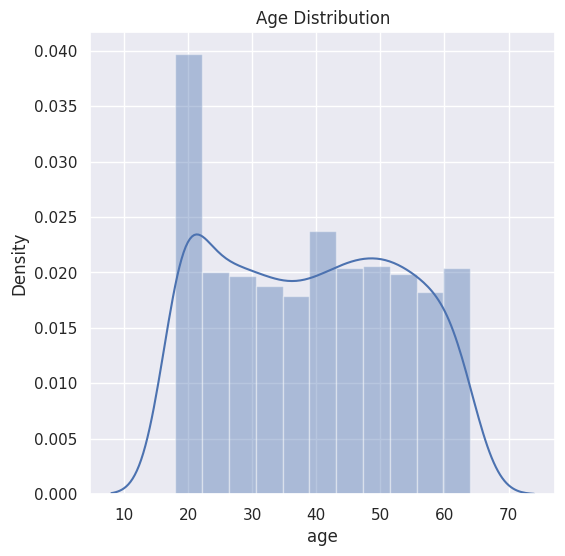

In [43]:
# Distribution of the age values

sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurance['age'])
plt.title('Age Distribution')
plt.show()

From the distribution plot, it is clearly visible that there is most number of people within the age range of around 20-23.

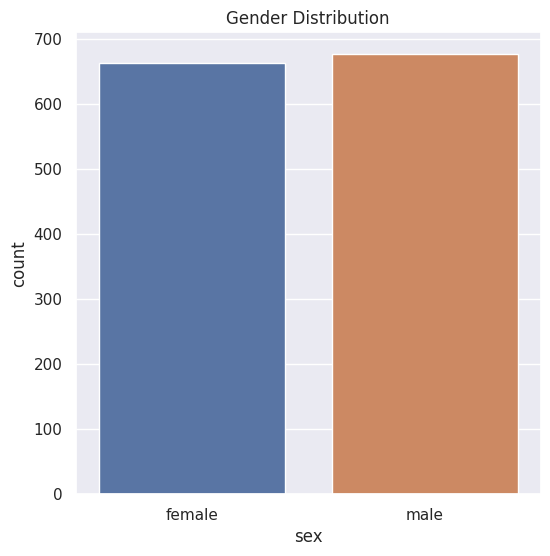

In [44]:
# Distribution of the gender

plt.figure(figsize = (6,6))
sns.countplot(x = 'sex', data = insurance)
plt.title('Gender Distribution')
plt.show()

In [45]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

There are 14 more male than female in this dataset. But it can be considered almost equal.

<ipython-input-46-4a89a522ce65>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['bmi'])


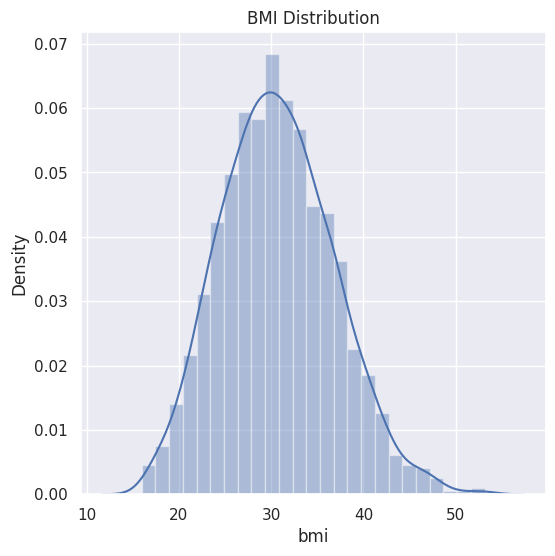

In [46]:
# Distribution of the bmi values

plt.figure(figsize = (6,6))
sns.distplot(insurance['bmi'])
plt.title('BMI Distribution')
plt.show()

It is observed that most number of people have BMI 28-32 as the distribution is Normal distribution. This means maximum people is overweight in this dataset. 

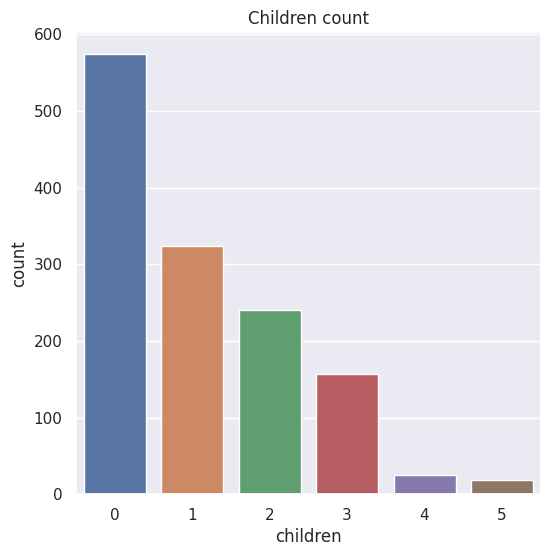

In [47]:
# Count of children

plt.figure(figsize = (6,6))
sns.countplot(x = "children", data = insurance)
plt.title('Children count')
plt.show()

In [48]:
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

From the plot, it is observed that a large number of people doesn't have any children. It is a 600 people which is almost all the people. Almost half of the people have one children.

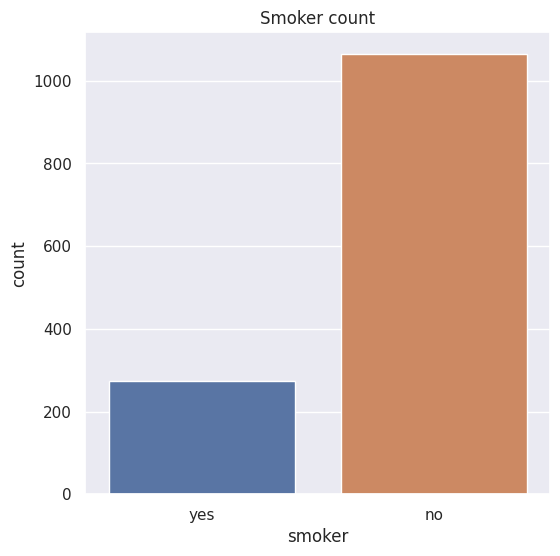

In [49]:
# Count of smoker

plt.figure(figsize = (6,6))
sns.countplot(x = "smoker", data = insurance)
plt.title('Smoker count')
plt.show()

In [50]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Therefore, maximum people in this dataset are non smoker.

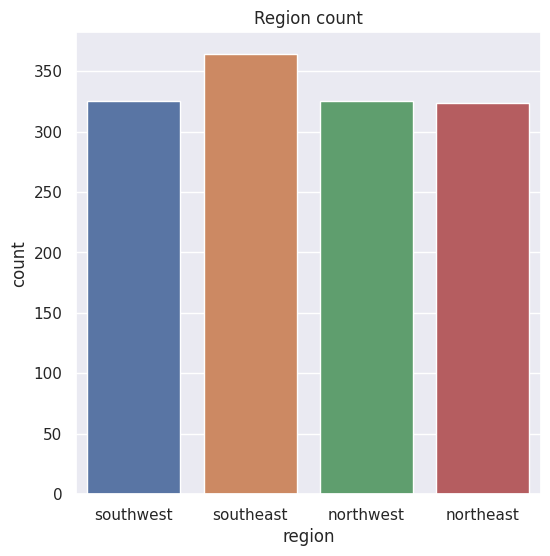

In [51]:
# Region column

plt.figure(figsize = (6,6))
sns.countplot(x = "region", data = insurance)
plt.title('Region count')
plt.show()

In [52]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Almost same number of people comes from southwest, northwest and northeast region. Slightly more people comes from southeast region. But the differences are almost neglegible. 

<ipython-input-53-02ad18772756>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['charges'])


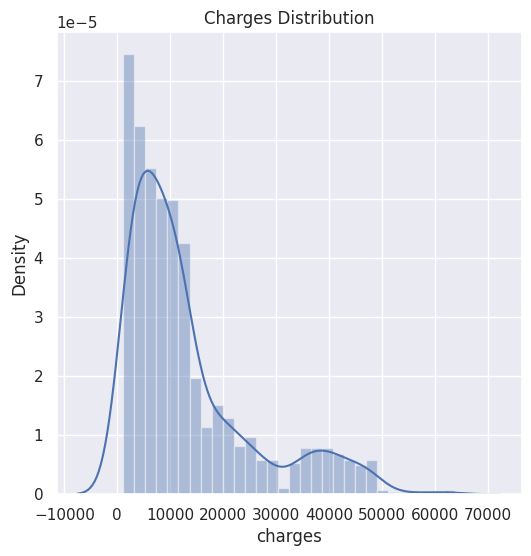

In [53]:
# Distribution of the charges

plt.figure(figsize = (6,6))
sns.distplot(insurance['charges'])
plt.title('Charges Distribution')
plt.show()

From the distribution we can see maximum amount of people are charged in 10,000- 17,000 dollar. Charges over 25,000 dollar are very little.

#### Data Preprocessing

Label Encoding

We can not feed categorical/ text data to our machine learning model. Computer just understand numerical values. So we have to convert the categorical values to mumerical values. This is called label encoding

In [54]:
#encoding 'sex' column
insurance.replace({'sex' : {'male':0, 'female':1}}, inplace = True)

#encoding 'smoker' column
insurance.replace({'smoker' : {'yes':0, 'no':1}}, inplace = True)

#encoding 'region' column
insurance.replace({'region' : {'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace = True)


In [55]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


Spliting the features (independent variable) and target (dependent variable)

In [56]:
x = insurance.drop(columns = 'charges', axis = 1)
y = insurance['charges']

In [57]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [58]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Spliting the dataset into Training data and Test data

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [60]:
x_train

,age,sex,bmi,children,smoker,region
882,21,1,22.135,0,1,2
505,37,0,30.875,3,1,3
798,58,1,33.100,0,1,1
792,22,1,23.180,0,1,2
201,48,1,32.230,1,1,0
...,...,...,...,...,...,...
466,60,1,28.700,1,1,1
299,48,1,28.880,1,1,3
493,61,0,43.400,0,1,1
527,51,1,25.800,1,1,1


In [61]:
x_test

,age,sex,bmi,children,smoker,region
17,23,0,23.845,0,1,2
1091,55,1,29.830,0,1,2
273,50,0,27.455,1,1,2
270,18,0,29.370,1,1,0
874,44,0,21.850,3,1,2
...,...,...,...,...,...,...
232,19,1,17.800,0,1,1
323,57,0,40.945,0,1,2
1337,61,1,29.070,0,0,3
1066,48,0,37.290,2,1,0


In [62]:
y_train

882      2585.85065
505      6796.86325
798     11848.14100
792      2731.91220
201      8871.15170
           ...     
466     13224.69300
299      9249.49520
493     12574.04900
527      9861.02500
1192    13019.16105
Name: charges, Length: 1070, dtype: float64

In [63]:
y_test

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
           ...     
232      1727.78500
323     11566.30055
1337    29141.36030
1066     8978.18510
966     23967.38305
Name: charges, Length: 268, dtype: float64

In [64]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


## Model Training

### Linear Regression

In [34]:
# Loading the linear regression model

regressor = LinearRegression()


In [71]:
# Seeing the coefficients

regressor.coef_

array([   251.40512196,     26.11715966,    330.64637157,    580.27438296,
       -23928.10171061,    212.22242728])

In [72]:
# Seeing the intercept

regressor.intercept_

11357.668742540951

In [74]:
# Training the model

regressor.fit(x_train, y_train)

LinearRegression()

### Model Evaluation

***Prediction on training data***

In [66]:
training_data_prediction = regressor.predict(x_train)

In [67]:
# R squared value

r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R Squared value: ', r2_train)

R Squared value:  0.751505643411174


***Prediction on test data***

In [69]:
test_data_prediction = regressor.predict(x_test)

In [76]:
test_data_prediction

array([ 1520.59242161, 11570.5920178 , 10082.43849883,  2246.21754312,
        7881.28362035, 11081.50227956,  3538.24791808,   698.03224036,
       12223.4851558 ,  9611.93217623, 11657.51046259,  4891.0539656 ,
       29947.50192274,  -370.8384887 , 12401.36048618, 13243.21522903,
        3814.42216541,  7883.39384825, 29431.34485576,  2362.83672121,
       12505.50452609,  2256.75277238, 34468.01948464, 31742.4859866 ,
       30306.19118561,  9027.76110059,  1923.87420399, 15247.09503907,
        6542.61302531,  2104.79910554,  9484.36642532,  5794.91649267,
        4425.26853454,  5015.3811241 ,  9579.4545934 ,  4601.74838962,
       29875.58083252,  6797.04084444, 27239.25811383, 13999.0938259 ,
         313.55184653, 28415.75044713,  7886.54751277,  1478.09056648,
       10273.28966107,  8003.09003405, 11612.15283896,  8175.95966058,
       10753.45200738, 13802.18082647,  5740.90172027,  -737.13333209,
       26346.21771217, 37192.66032995,  7364.09646118, 17845.51752284,
      

In [70]:
# R squared value

r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R Squared value: ', r2_test)

R Squared value:  0.7447273869684076


So this model shows a good accuracy with a R squared value of 0.74 and there is also no issue of overfitting as prediction on train data and test data almost showed equal efficiency.

***Comparing the given charges values (y_train) and predicted charges value (test_data_prediction) corresponding to test data values (y_test)***

In [75]:
print(np.concatenate((test_data_prediction.reshape(len(test_data_prediction) , 1), 
                      y_test.values.reshape(len(test_data_prediction),1)) , 1))

[[ 1520.59242161  2395.17155   ]
 [11570.5920178  11286.5387    ]
 [10082.43849883  9617.66245   ]
 [ 2246.21754312  1719.4363    ]
 [ 7881.28362035  8891.1395    ]
 [11081.50227956  5662.225     ]
 [ 3538.24791808 12609.88702   ]
 [  698.03224036  2196.4732    ]
 [12223.4851558  14254.6082    ]
 [ 9611.93217623  7209.4918    ]
 [11657.51046259 12222.8983    ]
 [ 4891.0539656   2219.4451    ]
 [29947.50192274 19444.2658    ]
 [ -370.8384887   1121.8739    ]
 [12401.36048618 26392.26029   ]
 [13243.21522903 12925.886     ]
 [ 3814.42216541  3645.0894    ]
 [ 7883.39384825  5327.40025   ]
 [29431.34485576 18972.495     ]
 [ 2362.83672121  2203.47185   ]
 [12505.50452609 11840.77505   ]
 [ 2256.75277238  2597.779     ]
 [34468.01948464 40182.246     ]
 [31742.4859866  22331.5668    ]
 [30306.19118561 37484.4493    ]
 [ 9027.76110059 10577.087     ]
 [ 1923.87420399  3206.49135   ]
 [15247.09503907  8944.1151    ]
 [ 6542.61302531  3577.999     ]
 [ 2104.79910554  3176.8159    ]
 [ 9484.36

In [79]:
#Model Accuracy

print('Model Accuracy: ',regressor.score(x_test, y_test)*100 , ' %')

Model Accuracy:  74.47273869684075  %
